# Features visualization

In [1]:
import torch
import pandas as pd
import os
import warnings
import numpy as np
from tqdm import tqdm
warnings.filterwarnings("ignore")
from models import TransformerRegressionModel
import sys
sys.path.append("/code/LLM-crime")
from custom_clip_train import CLIPModel, CLIPDataset, build_loaders, make_prediction

In [2]:
example_data_path = pd.read_pickle("/data_nas/cehou/LLM_safety/dataset_30_female_HongKong_murder_746.pkl")
text_data = [example_data_path[i]['text_description'] for i in range(len(example_data_path))]

In [75]:
answer = [i.split("<\\s> [INST]")[0] for i in text_data[0].split(" [/INST] ")][1:]
question = [text_data[0].split(" [/INST] ")[0][7:]] + [i.split("<\\s> [INST]")[1] for i in text_data[0].split(" [/INST] ")[1:-1]]

In [67]:
print(answer[7])

Based on the elements present in the panoramic street view image, the overall safety perception in this location appears to be relatively positive. The street is well-lit and clear, with no visible obstructions or suspicious activity. There are no visible signs of vandalism or graffiti, and the area appears to be well-maintained and cared for.

However, there are some potential concerns that could affect people's perception of safety in this location. For example, there are no visible surveillance cameras or other surveillance systems, which could make people feel less safe, as they know that their activities are not being monitored. Additionally, there are no visible law enforcement officers or vehicles, which could make people feel less safe, as they know that help is not immediately available in case of an emergency.

Overall, the safety perception in this location appears to be relatively positive, but there are some potential concerns that should be addressed in order to further i

In [66]:
print(answer[6])

The panoramic street view image shows a street scene with a variety of elements that could affect people's perception of safety regarding murder. Here is an evaluation of the safety perception brought to us by each of these elements:

1. Lighting: The street appears to be well-lit, with streetlights visible on both sides of the street. This could make people feel safer, as they can see what is happening around them and can also be seen by others, which can deter potential criminals.
2. Visibility: The street is relatively clear, with no obstructions visible in the image. This could make people feel safer, as they can see what is happening around them and can also be seen by others, which can deter potential criminals.
3. Pedestrian activity: There are no people visible in the image, which could make the street feel less safe, as people are less likely to notice and report suspicious activity when there are no witnesses.
4. Surveillance: There are no visible surveillance cameras or othe

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 定义两个字符串

def cal_text_similarity(str_list):
    # 将文本转换为tf-idf特征
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(str_list)
    # 计算两个字符串之间的余弦相似度
    similarity = cosine_similarity(tfidf)
    return similarity

sim_mat_a = cal_text_similarity(answer)
sim_mat_q = cal_text_similarity(question)


<Axes: >

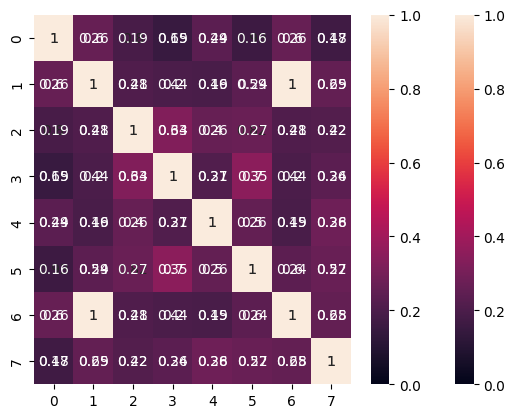

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplot(1,2)

sns.heatmap(sim_mat_a, annot=True,vmin=0,vmax=1)
sns.heatmap(sim_mat_q, annot=True,vmin=0,vmax=1)

In [34]:
print(tem[6])

The panoramic street view image shows a street scene with a variety of elements that could affect people's perception of safety regarding murder. Here is an evaluation of the safety perception brought to us by each of these elements:

1. Lighting: The street appears to be well-lit, with streetlights visible on both sides of the street. This could make people feel safer, as they can see what is happening around them and can also be seen by others, which can deter potential criminals.
2. Visibility: The street is relatively clear, with no obstructions visible in the image. This could make people feel safer, as they can see what is happening around them and can also be seen by others, which can deter potential criminals.
3. Pedestrian activity: There are no people visible in the image, which could make the street feel less safe, as people are less likely to notice and report suspicious activity when there are no witnesses.
4. Surveillance: There are no visible surveillance cameras or othe

In [170]:
cfg = 'baseline'
img_feature = np.load(f"/data1/cehou_data/LLM_safety/middle_variables/{cfg}/img_feature.npy")
text_feature = np.load(f"/data1/cehou_data/LLM_safety/middle_variables/{cfg}/text_feature.npy")
predictions = np.load(f"/data1/cehou_data/LLM_safety/middle_variables/{cfg}/predictions.npy")


In [171]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算文本特征之间的余弦相似性
text_feature_similarity = cosine_similarity(text_feature)
img_feature_similarity = cosine_similarity(img_feature)

<Axes: >

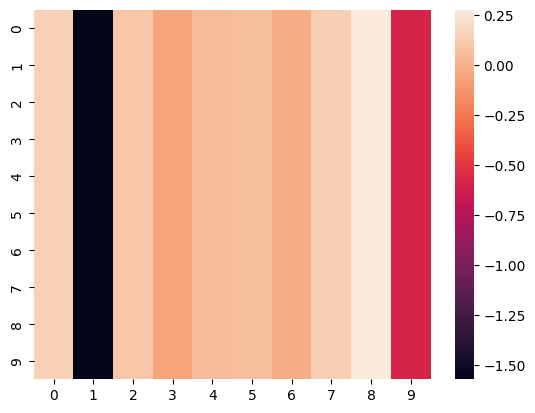

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(text_feature[:10,:10])

## 计算文本间相似性


In [173]:
if cfg == 'baseline':
    data = pd.read_pickle(f"/data1/cehou_data/LLM_safety/dataset_baseline_746.pkl")
else:
    data = pd.read_pickle(f"/data1/cehou_data/LLM_safety/dataset_30_{cfg}_HongKong_murder_746.pkl")
text_describe_list = [data[i]['text_description'] for i in range(len(data))]

In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 定义两个字符串

def cal_text_similarity(str_list):
    # 将文本转换为tf-idf特征
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(str_list)
    # 计算两个字符串之间的余弦相似度
    similarity = cosine_similarity(tfidf)
    return similarity

text_similarity = cal_text_similarity(text_describe_list)

In [175]:
# 获取对角线以上上半部分的元素及其位置
upper_triangle_indices = np.triu_indices(text_similarity.shape[0], k=1)
upper_triangle_values = text_similarity[upper_triangle_indices]

# 记录位置
positions = list(zip(upper_triangle_indices[0], upper_triangle_indices[1]))

In [176]:
from PIL import Image
def get_img(dataset, idx):
    for i,path in enumerate(dataset[idx]["GSV_path"]):
        if i == 0:
            GSV_img = np.array(Image.open(path))
        else:
            GSV_img = np.concatenate((GSV_img, np.array(Image.open(path))), axis=1)
    return GSV_img

def cal_img_similarity(dataset, img1_idx, img2_idx):
    img1 = get_img(dataset, img1_idx)
    img2 = get_img(dataset, img2_idx)
    img1_flat = img1.flatten().reshape(1, -1)
    img2_flat = img2.flatten().reshape(1, -1)
    img_similarity = cosine_similarity(img1_flat, img2_flat)
    return img_similarity[0][0]

In [177]:
evaluation_df = pd.DataFrame(columns=['img1_idx', 'img2_idx', 'config', 'text_similarity', 'img_similarity','text_feature_similarity','img_feature_similarity'])
for i in range(25):
    for j in range(25):
        if i < j:
            img_similarity = cal_img_similarity(data, i, j)
            evaluation_df = evaluation_df.append({'img1_idx': i, 'img2_idx': j, 'config':cfg, 'text_similarity': text_similarity[i][j], 'img_similarity': img_similarity, 'text_feature_similarity': text_feature_similarity[i][j], 'img_feature_similarity': img_feature_similarity[i][j]}, ignore_index=True)            
            
evaluation_df.to_csv(f"/data1/cehou_data/LLM_safety/middle_variables/{cfg}/evaluation_df.csv", index=False)

Text(0.95, 0.95, 'Correlation: -0.26')

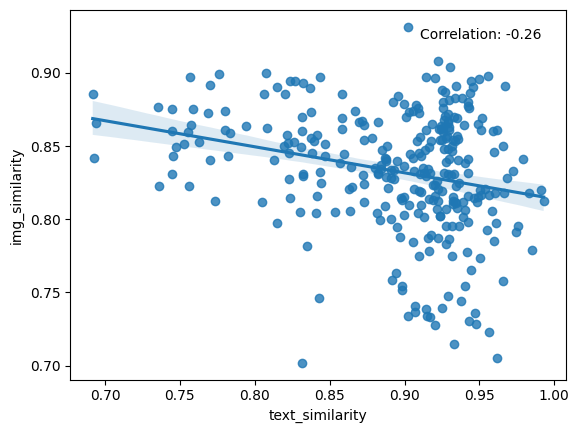

In [178]:

# 计算相关系数
correlation = np.corrcoef(evaluation_df['text_similarity'], evaluation_df['img_similarity'])[0, 1]

sns.regplot(x='text_similarity', y='img_similarity', data=evaluation_df)
# 标记相关系数
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

Text(0.95, 0.95, 'Correlation: nan')

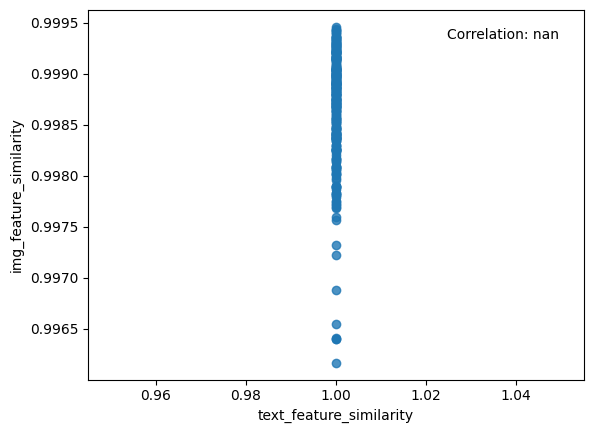

In [179]:
correlation = np.corrcoef(evaluation_df['text_feature_similarity'], evaluation_df['img_feature_similarity'])[0, 1]

sns.regplot(x='text_feature_similarity', y='img_feature_similarity', data=evaluation_df)
# 标记相关系数
plt.text(0.95, 0.95, f'Correlation: {correlation:.2f}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes)

[[0.9999999  0.9999999  0.9999999  ... 0.9999999  0.99999994 0.99999994]
 [0.9999999  0.9999999  0.9999999  ... 0.9999999  0.99999994 0.99999994]
 [0.9999999  0.9999999  0.9999999  ... 0.9999999  0.99999994 0.99999994]
 ...
 [0.9999999  0.9999999  0.9999999  ... 0.9999999  0.99999994 0.99999994]
 [0.99999994 0.99999994 0.99999994 ... 0.99999994 1.         1.        ]
 [0.99999994 0.99999994 0.99999994 ... 0.99999994 1.         1.        ]]


<Axes: >

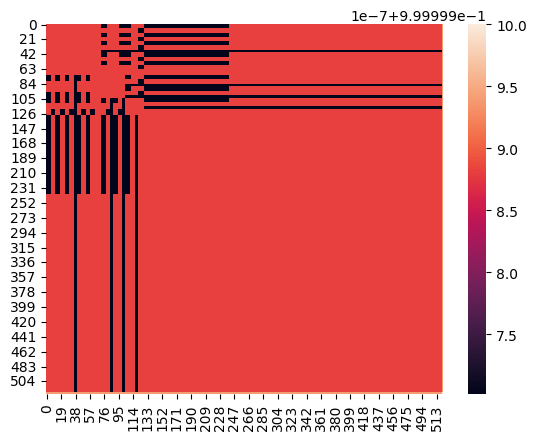

In [180]:
from sklearn.metrics.pairwise import cosine_similarity

# 计算文本特征之间的余弦相似性
text_similarity_matrix = cosine_similarity(text_feature)

# 打印相似性矩阵
print(text_similarity_matrix)
sns.heatmap(text_similarity_matrix)

In [ ]:
for i,cfg in enumerate(['male','female','baseline']):
    data = pd.read_csv(f"/data1/cehou_data/LLM_safety/middle_variables/{cfg}/evaluation_df.csv")
    if i == 0:
        all_data = data
    else:
        all_data = pd.concat([all_data, data], axis=0, ignore_index=True)

In [ ]:
sns.scatterplot(
   x="text_similarity",
   y="img_similarity",
   data=all_data,
   hue='config',
)